In [144]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import matplotlib as mpl


In [145]:
df = pd.read_csv("data/AI_raw_data.txt",header = 0, delimiter = '\t' )

# Data Prep

In [146]:
df.head()

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.
0,"Sat, 03 Dec 2016","AI,CC",e,ENG v AUS,37-21,4:2,5-0,"Twickenham, London",NaN
1,"Sat, 26 Nov 2016","AI,DG",NaN,FRA v NZL,19-24,1:3,1-4,"Stade de France, Paris",NaN
2,"Sat, 26 Nov 2016",AI,NaN,IRE v AUS,27-24,3:3,4-1,"Lansdowne Rd, Dublin",NaN
3,"Sat, 26 Nov 2016",AI,NaN,WAL v SAF,27-13,2:1,4-0,"Millennium Stadium, Cardiff",NaN
4,"Sat, 26 Nov 2016",AI,NaN,ENG v ARG,27-14,2:2,4-0,"Twickenham, London",NaN


In [147]:
df['Home Team'], df['Away Team'] = df['Match'].str.split('v').str

In [148]:
df['Home Score'], df['Away Score'] = df['Score'].str.split('-').str
df['Home Tries'], df['Away Tries'] = df['Tries'].str.split(':').str

In [149]:
df['Home Team'] = df['Home Team'].map(lambda x: x.strip())

In [150]:
df['Away Team'] = df['Away Team'].map(lambda x: x.strip())

In [151]:
df[['Home Score', 'Away Score', 'Home Tries', 'Away Tries']] = df[['Home Score', 'Away Score', 'Home Tries', 'Away Tries']].apply(pd.to_numeric)

In [152]:
df.head()

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries
0,"Sat, 03 Dec 2016","AI,CC",e,ENG v AUS,37-21,4:2,5-0,"Twickenham, London",NaN,ENG,AUS,37,21,4,2
1,"Sat, 26 Nov 2016","AI,DG",NaN,FRA v NZL,19-24,1:3,1-4,"Stade de France, Paris",NaN,FRA,NZL,19,24,1,3
2,"Sat, 26 Nov 2016",AI,NaN,IRE v AUS,27-24,3:3,4-1,"Lansdowne Rd, Dublin",NaN,IRE,AUS,27,24,3,3
3,"Sat, 26 Nov 2016",AI,NaN,WAL v SAF,27-13,2:1,4-0,"Millennium Stadium, Cardiff",NaN,WAL,SAF,27,13,2,1
4,"Sat, 26 Nov 2016",AI,NaN,ENG v ARG,27-14,2:2,4-0,"Twickenham, London",NaN,ENG,ARG,27,14,2,2


In [153]:
df['Home Win'] = df['Home Score'] > df['Away Score']

In [154]:
df['Winner'] = np.where(df['Home Win'], df['Home Team'], df['Away Team'])

In [155]:
df['Margin'] = abs(df['Home Score'] - df['Away Score'])

In [156]:
df.loc[df['Margin']==0, 'Winner'] = 'Draw'

In [157]:
df['Date'] = pd.to_datetime(df['Date'])

In [158]:
df.head()

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
0,2016-12-03,"AI,CC",e,ENG v AUS,37-21,4:2,5-0,"Twickenham, London",NaN,ENG,AUS,37,21,4,2,True,ENG,16
1,2016-11-26,"AI,DG",NaN,FRA v NZL,19-24,1:3,1-4,"Stade de France, Paris",NaN,FRA,NZL,19,24,1,3,False,NZL,5
2,2016-11-26,AI,NaN,IRE v AUS,27-24,3:3,4-1,"Lansdowne Rd, Dublin",NaN,IRE,AUS,27,24,3,3,True,IRE,3
3,2016-11-26,AI,NaN,WAL v SAF,27-13,2:1,4-0,"Millennium Stadium, Cardiff",NaN,WAL,SAF,27,13,2,1,True,WAL,14
4,2016-11-26,AI,NaN,ENG v ARG,27-14,2:2,4-0,"Twickenham, London",NaN,ENG,ARG,27,14,2,2,True,ENG,13


In [159]:
df.to_csv("data/AI_processed.csv", index = False)

# Analysis


## Number of matches a year

In [160]:
df['Date'].min()

Timestamp('1973-11-10 00:00:00')

In [161]:
df['Date'].max()

Timestamp('2016-12-03 00:00:00')

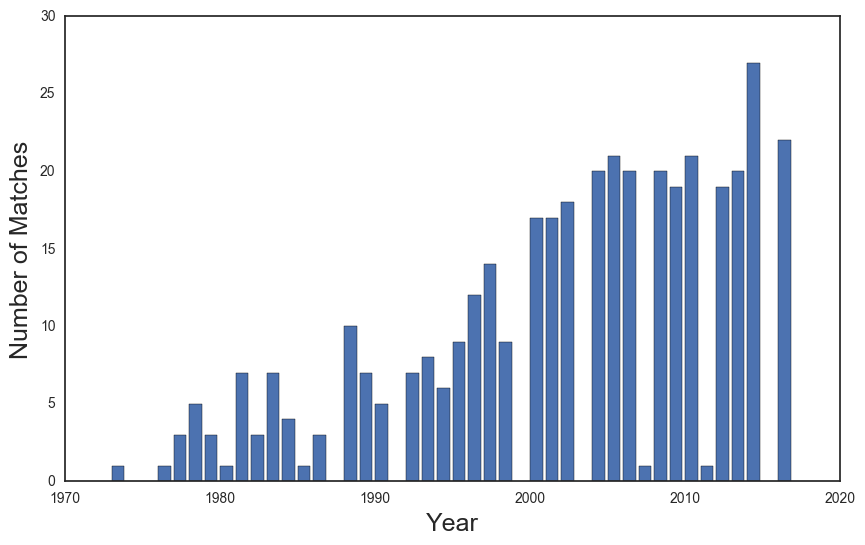

In [209]:
sns.set_style("white")
plt.figure(figsize=(10,6))
mpl.rcParams['font.size'] = 20
plt.bar(df['Date'].dt.year.value_counts().index,df['Date'].dt.year.value_counts().values)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of Matches', fontsize =18)
plt.savefig('figures\matches_per_year.png')
plt.show()

World Cup four year cycle evident apart from 1995 when it was all wrapped up by June. Interestingly it was finished by Jun in 1987 as well and there were no Autumn internationals.

## Overall Results

In [163]:
df['Home Win'].sum()

194

In [164]:
len(df)-df['Home Win'].sum()

195

In [165]:
len(df[df['Winner']=='Draw'])

9

In [166]:
len(df)-df['Home Win'].sum() -len(df[df['Winner']=='Draw'])

186

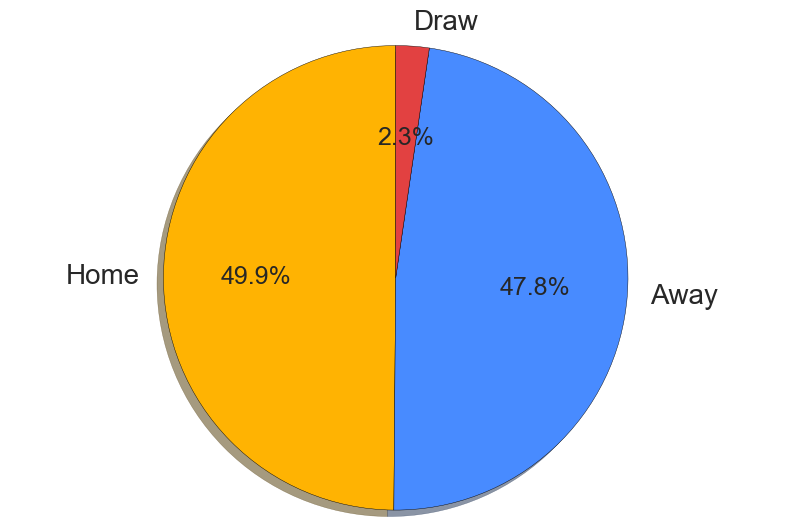

In [227]:
#change colour and beautify
labels = 'Home', 'Away','Draw'
sizes = [df['Home Win'].sum(), len(df)-df['Home Win'].sum() -len(df[df['Winner']=='Draw']), len(df[df['Winner']=='Draw'])]
explode = (0, 0, 0.3,)
fig1, ax1 = plt.subplots(figsize=(10,6))
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f% %',
shadow=True, startangle=90,colors=['#ffb302','#488bff','#e24141'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title("Match results")
texts[0].set_fontsize(20), texts[1].set_fontsize(20), texts[2].set_fontsize(20)
plt.savefig('figures/results.png')
plt.show()

## Winning Margin

In [168]:
df['Margin'].median()

14.0

In [169]:
sns.set_style("white")

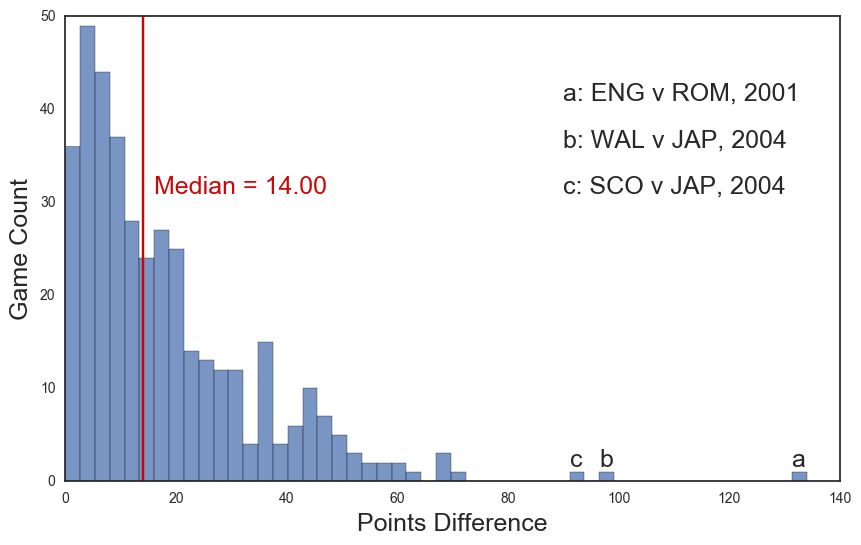

In [211]:
plt.figure(figsize=(10,6))
plt.hist(df['Margin'], bins = 50, alpha = 0.75)
#plt.title('Winning Margin Distribution', fontsize=20)
plt.xlabel('Points Difference', fontsize=18)
plt.ylabel('Game Count', fontsize=18)
#plt.axvline(df['Margin'].mean())
#plt.text(20,41,'Mean = {0:.2f}'.format(df['Margin'].mean()))
plt.axvline(df['Margin'].median(), color='#cc0606')
plt.text(16,31,'Median = {0:.2f}'.format(df['Margin'].median()), color='#cc0606')
plt.text(90,41, "a: ENG v ROM, 2001")
plt.text(90,36, "b: WAL v JAP, 2004")
plt.text(90,31, "c: SCO v JAP, 2004")
plt.text(91.2,1.6,"c")
plt.text(96.5,1.6,"b")
plt.text(131.2,1.6,"a")
#plt.axvline(df['Margin'].median())
plt.savefig('figures\magin_dist.png')
plt.show()

In [171]:
margin_group = df['Margin'].groupby(df['Home Win'])

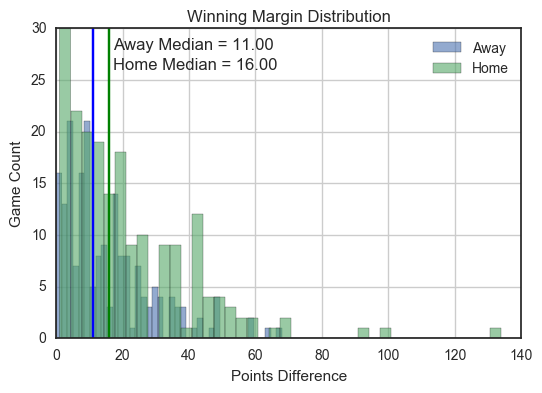

In [172]:
margin_group.hist(alpha=0.6, bins = 40)
plt.title('Winning Margin Distribution')
plt.xlabel('Points Difference')
plt.ylabel('Game Count')
plt.legend(['Away', 'Home'])
plt.axvline(margin_group.median()[1], color = 'g')
plt.text(17,26,'Home Median = {0:.2f}'.format(margin_group.median()[1]))
plt.axvline(margin_group.median()[0])
plt.text(17,28,'Away Median = {0:.2f}'.format(margin_group.median()[0]))
plt.show()

In [173]:
df['Margin'].max()

134

In [174]:
df[df['Margin'] == df['Margin'].max()]

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
237,2001-11-17,AI,NaN,ENG v ROM,134-0,20:0,5-0,"Twickenham, London",NaN,ENG,ROM,134,0,20,0,True,ENG,134


In [175]:
df[df['Margin'] >80]

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
196,2004-11-26,AI,NaN,WAL v JAP,98-0,14:0,5-0,"Millennium Stadium, Cardiff",NaN,WAL,JAP,98,0,14,0,True,WAL,98
204,2004-11-13,AI,NaN,SCO v JAP,100-8,15:1,5-0,"McDiarmid Park, Perth_SCO",NaN,SCO,JAP,100,8,15,1,True,SCO,92
237,2001-11-17,AI,NaN,ENG v ROM,134-0,20:0,5-0,"Twickenham, London",NaN,ENG,ROM,134,0,20,0,True,ENG,134


### Draws

In [176]:
df[df['Winner'] =='Draw']

,Date,Tourn,Rnd,Match,Score,Tries,Pnts,Venue,Neut.,Home Team,Away Team,Home Score,Away Score,Home Tries,Away Tries,Home Win,Winner,Margin
100,2010-11-19,AI,NaN,WAL v FIJ,16-16,1:1,2-2,"Millennium Stadium, Cardiff",NaN,WAL,FIJ,16,16,1,1,False,Draw,0
121,2009-11-15,AI,NaN,IRE v AUS,20-20,2:2,2-2,"Croke Park, Dublin",NaN,IRE,AUS,20,20,2,2,False,Draw,0
169,2006-11-04,AI,NaN,WAL v AUS,29-29,2:4,2-3,"Millennium Stadium, Cardiff",NaN,WAL,AUS,29,29,2,4,False,Draw,0
218,2002-11-16,"AI,DG",NaN,FRA v NZL,20-20,2:2,2-2,"Stade de France, Paris",NaN,FRA,NZL,20,20,2,2,False,Draw,0
273,1997-12-06,AI,2,ENG v NZL,26-26,3:2,2-2,"Twickenham, London",NaN,ENG,NZL,26,26,3,2,False,Draw,0
282,1997-11-15,"AI,CC",a,ENG v AUS,15-15,0:2,2-2,"Twickenham, London",NaN,ENG,AUS,15,15,0,2,False,Draw,0
300,1995-11-18,AI,NaN,SCO v SAM,15-15,0:2,2-2,"Murrayfield, Edinburgh",NaN,SCO,SAM,15,15,0,2,False,Draw,0
361,1983-11-13,AI,NaN,FRA v AUS,15-15,0:1,2-2,Clermont Ferrand,NaN,FRA,AUS,15,15,0,1,False,Draw,0
363,1983-11-12,AI,NaN,SCO v NZL,25-25,1:3,2-2,"Murrayfield, Edinburgh",NaN,SCO,NZL,25,25,1,3,False,Draw,0


### Winning Score vs Num Tries

In [177]:
df_no_draws = df[df['Winner'] !='Draw']

In [178]:
a = df_no_draws[(df_no_draws['Home Tries'] > df_no_draws['Away Tries']) & df_no_draws['Home Win']]

In [179]:
b= df_no_draws[(df_no_draws['Home Tries'] < df_no_draws['Away Tries']) & (df_no_draws['Home Win']== False)]

In [180]:
c = df_no_draws[(df_no_draws['Home Tries'] == df_no_draws['Away Tries']) ]

Winning with less tries

In [181]:
100 - (len(a) + len(b) + len(c)) / len(df_no_draws)*100

6.84210526315789

Winning with most tries 

In [182]:
(len(a) + len(b))/len(df_no_draws)*100

77.10526315789473

Equal tries

In [183]:
len(c) / len(df_no_draws)*100

16.05263157894737

In [184]:
100 - (len(a) + len(b))/len(df_no_draws)*100 - len(c) / len(df_no_draws)*100

6.8421052631579045

In [185]:
c['Home Win'].value_counts()

True     41
False    20
Name: Home Win, dtype: int64

## Winning %

In [186]:
games_played = pd.concat([df['Away Team'], df['Home Team']]).value_counts()

In [187]:
winners = df['Winner'].value_counts()

In [188]:
win_perc = pd.concat([games_played, winners], axis = 1).reset_index()
win_perc.columns = ['Country', 'Games Played', 'Games Won']
win_perc.fillna(0, inplace = True)
win_perc[['Games Played','Games Won']] = win_perc[['Games Played','Games Won']].astype(int)
win_perc = win_perc[win_perc['Country'] != 'Draw'].reset_index()

In [189]:
win_perc['Win Percentage'] = (win_perc['Games Won'] / win_perc['Games Played'])*100

In [190]:
win_perc.sort_values('Win Percentage', ascending = False)

,index,Country,Games Played,Games Won,Win Percentage
11,12,NZL,76,64,84.210526
15,16,SAF,61,39,63.934426
3,4,ENG,68,42,61.764706
7,8,IRE,57,35,61.403509
1,1,AUS,80,49,61.250000
5,6,FRA,76,44,57.894737
13,14,POR,2,1,50.000000
17,18,SCO,57,25,43.859649
20,21,WAL,73,31,42.465753
0,0,ARG,48,17,35.416667


In [191]:
win_perc['Win Percentage'].values

array([ 35.41666667,  61.25      ,  15.78947368,  61.76470588,
         8.33333333,  57.89473684,   0.        ,  61.40350877,
        32.69230769,   0.        ,   0.        ,  84.21052632,
        16.66666667,  50.        ,  10.        ,  63.93442623,
        16.66666667,  43.85964912,  30.76923077,   0.        ,  42.46575342])

In [192]:
win_perc.sort_values('Win Percentage', ascending = False).to_csv("data/win_perc.csv", sep = ',',index = False)

In [193]:
ord_win_perc = win_perc.sort_values('Win Percentage', ascending = False).reset_index()

In [194]:
ord_win_perc.Country.values

array(['NZL', 'SAF', 'ENG', 'IRE', 'AUS', 'FRA', 'POR', 'SCO', 'WAL',
       'ARG', 'ITA', 'TON', 'PAC', 'SAM', 'CAN', 'ROM', 'FIJ', 'JAP',
       'GEO', 'USA', 'NAM'], dtype=object)

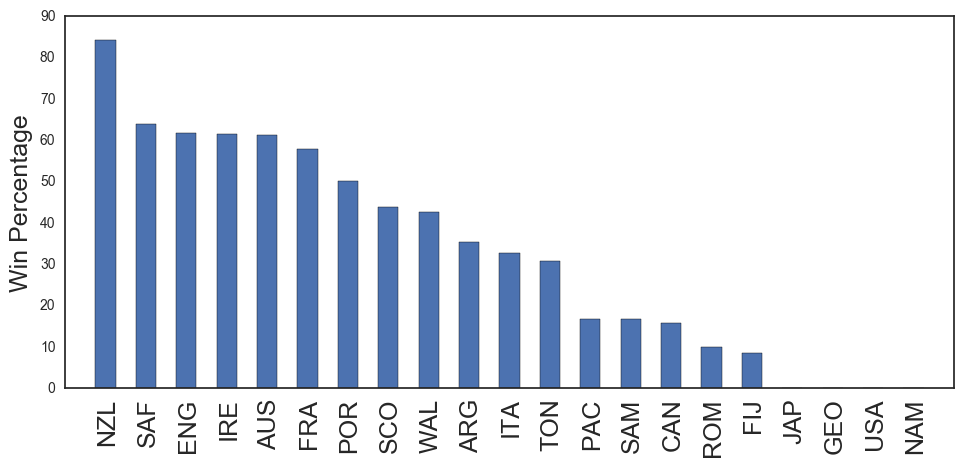

In [235]:
ind = np.arange(len(ord_win_perc))
width = .5
fig, ax = plt.subplots(figsize = (10,5))
rect = ax.bar(ind,ord_win_perc['Win Percentage'].values,width, align='center')
ax.set_xticks(ind+0.05)
plt.xlim(-1, 21)
ax.set_xticklabels(ord_win_perc.Country.values, rotation=90, fontsize=18)
ax.set_ylabel("Win Percentage", fontsize=18)
plt.tight_layout()
plt.savefig('figures/win_perc.png')
plt.show()

## Focus on a few of this years games

Ireland - SA

England - Australia

Wales - Australia

Ireland - Argentina

Scotland - NZ

Scotland - Australia

Wales - NZ

Wales - SA

### Ireland vs SA , Argentina

In [196]:
df[(df['Match'] == 'IRE v SAF') | (df['Match'] == 'SAF v IRE')]['Winner'].value_counts()

SAF    4
IRE    4
Name: Winner, dtype: int64

In [197]:
df[(df['Match'] == 'IRE v ARG') | (df['Match'] == 'ARG v IRE')]['Winner'].value_counts()

IRE    7
Name: Winner, dtype: int64

### England vs Argentina, Australia

In [198]:
df[(df['Match'] == 'ENG v ARG') | (df['Match'] == 'ARG v ENG')]['Winner'].value_counts()

ENG    6
ARG    1
Name: Winner, dtype: int64

In [199]:
df[(df['Match'] == 'ENG v AUS') | (df['Match'] == 'AUS v ENG')]['Winner'].value_counts()

ENG     10
AUS      6
Draw     1
Name: Winner, dtype: int64

### Wales vs Australia, SAF, NZ

In [200]:
df[(df['Match'] == 'WAL v AUS') | (df['Match'] == 'AUS v WAL')]['Winner'].value_counts()

AUS     11
WAL      3
Draw     1
Name: Winner, dtype: int64

In [201]:
df[(df['Match'] == 'WAL v SAF') | (df['Match'] == 'SAF v WAL')]['Winner'].value_counts()

SAF    10
WAL     2
Name: Winner, dtype: int64

In [202]:
df[(df['Match'] == 'WAL v NZL') | (df['Match'] == 'NZL v WAL')]['Winner'].value_counts()

NZL    13
Name: Winner, dtype: int64

### Scotland vs NZ, Australia

In [203]:
df[(df['Match'] == 'SCO v NZL') | (df['Match'] == 'NZL v SCO')]['Winner'].value_counts()

NZL     9
Draw    1
Name: Winner, dtype: int64

In [204]:
df[(df['Match'] == 'SCO v AUS') | (df['Match'] == 'AUS v SCO')]['Winner'].value_counts()

AUS    10
SCO     2
Name: Winner, dtype: int64